In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/clean_data.csv")

In [3]:
df.head()

,EssayNo,Author,Essay
0,1,Alexander Hamilton,\nGeneral Introduction\n\nFor the Independent ...
1,2,John Jay,\nConcerning Dangers from Foreign Force and In...
2,3,John Jay,\nThe Same Subject Continued: Concerning Dange...
3,4,John Jay,\nThe Same Subject Continued: Concerning Dange...
4,5,John Jay,\nThe Same Subject Continued: Concerning Dange...


In [4]:
df.loc[0]

EssayNo                                                    1
Author                                    Alexander Hamilton
Essay      \nGeneral Introduction\n\nFor the Independent ...
Name: 0, dtype: object

In [5]:
print(df.loc[0].Essay)


General Introduction

For the Independent Journal.



To the People of the State of New York:

AFTER an unequivocal experience of the inefficiency of the subsisting federal government you are called upon to deliberate on a new Constitution for the United States of America. The subject speaks its own importance; comprehending in its consequences nothing less than the existence of the UNION the safety and welfare of the parts of which it is composed the fate of an empire in many respects the most interesting in the world. It has been frequently remarked that it seems to have been reserved to the people of this country by their conduct and example to decide the important question whether societies of men are really capable or not of establishing good government from reflection and choice or whether they are forever destined to depend for their political constitutions on accident and force. If there be any truth in the remark the crisis at which we are arrived may with propriety be regard

In [6]:
df["Author"].unique()

array(['Alexander Hamilton', 'John Jay', 'James Madison',
       'Alexander Hamilton and James Madison', 'Unknown'], dtype=object)

In [26]:
len(df[df["Author"] == "Alexander Hamilton and James Madison"])

3

In [7]:
data = df[df["Author"] != "Alexander Hamilton and James Madison"]
data = data.set_index("EssayNo")

In [8]:
data

,Author,Essay
EssayNo,,
1,Alexander Hamilton,\nGeneral Introduction\n\nFor the Independent ...
2,John Jay,\nConcerning Dangers from Foreign Force and In...
3,John Jay,\nThe Same Subject Continued: Concerning Dange...
4,John Jay,\nThe Same Subject Continued: Concerning Dange...
5,John Jay,\nThe Same Subject Continued: Concerning Dange...
...,...,...
81,Alexander Hamilton,\nThe Judiciary Continued and the Distribution...
82,Alexander Hamilton,\nThe Judiciary Continued\nFrom McLEAN'S Editi...
83,Alexander Hamilton,\nThe Judiciary Continued in Relation to Trial...


In [9]:
data.Author.unique()

array(['Alexander Hamilton', 'John Jay', 'James Madison', 'Unknown'],
      dtype=object)

In [10]:
X_train, y_train = data[data.Author != "Unknown"].drop("Author", axis=1), data[data.Author != "Unknown"].Author
X_test, y_test = data[data.Author == "Unknown"].drop("Author", axis=1), data[data.Author == "Unknown"].Author

In [11]:
len(y_train)

71

In [12]:
X_train, y_train

(                                                     Essay
 EssayNo                                                   
 1        \nGeneral Introduction\n\nFor the Independent ...
 2        \nConcerning Dangers from Foreign Force and In...
 3        \nThe Same Subject Continued: Concerning Dange...
 4        \nThe Same Subject Continued: Concerning Dange...
 5        \nThe Same Subject Continued: Concerning Dange...
 ...                                                    ...
 81       \nThe Judiciary Continued and the Distribution...
 82       \nThe Judiciary Continued\nFrom McLEAN'S Editi...
 83       \nThe Judiciary Continued in Relation to Trial...
 84       \nCertain General and Miscellaneous Objections...
 85       \nConcluding Remarks\nFrom McLEAN'S Edition Ne...
 
 [71 rows x 1 columns],
 EssayNo
 1     Alexander Hamilton
 2               John Jay
 3               John Jay
 4               John Jay
 5               John Jay
              ...        
 81    Alexander Hamilton
 82

In [13]:
import matplotlib.pyplot as plt

In [14]:
words = {}
article = X_train.iloc[0].Essay.replace("\n", "")
for word in article.split(" "):
    if word not in words:
        words[word] = 1
    else:
        words[word] += 1


In [15]:
words

{'General': 1,
 'IntroductionFor': 1,
 'the': 117,
 'Independent': 1,
 'Journal.To': 1,
 'People': 1,
 'of': 98,
 'State': 5,
 'New': 1,
 'York:AFTER': 1,
 'an': 9,
 'unequivocal': 1,
 'experience': 1,
 'inefficiency': 1,
 'subsisting': 1,
 'federal': 1,
 'government': 4,
 'you': 6,
 'are': 12,
 'called': 1,
 'upon': 6,
 'to': 63,
 'deliberate': 1,
 'on': 8,
 'a': 23,
 'new': 6,
 'Constitution': 4,
 'for': 10,
 'United': 1,
 'States': 2,
 'America.': 1,
 'The': 3,
 'subject': 4,
 'speaks': 1,
 'its': 8,
 'own': 3,
 'importance;': 1,
 'comprehending': 1,
 'in': 25,
 'consequences': 2,
 'nothing': 3,
 'less': 1,
 'than': 11,
 'existence': 1,
 'UNION': 4,
 'safety': 1,
 'and': 37,
 'welfare': 2,
 'parts': 1,
 'which': 17,
 'it': 13,
 'is': 13,
 'composed': 1,
 'fate': 1,
 'empire': 2,
 'many': 5,
 'respects': 1,
 'most': 2,
 'interesting': 2,
 'world.': 1,
 'It': 3,
 'has': 6,
 'been': 3,
 'frequently': 1,
 'remarked': 1,
 'that': 26,
 'seems': 1,
 'have': 10,
 'reserved': 1,
 'people': 4

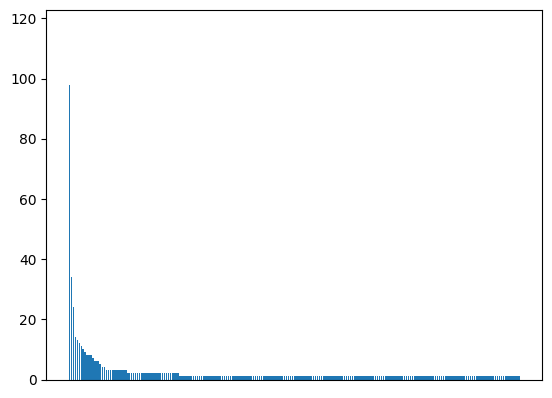

In [16]:
keys = sorted(words.keys(), key=lambda x: words[x], reverse=True)
values = sorted(words.values(), reverse=True)
plt.xticks([])
plt.bar(keys, values)
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

train_data = cv.fit_transform(X_train.Essay)
test_data = cv.transform(X_test.Essay)

In [18]:
train_data.shape, y_train.shape

((71, 8162), (71,))

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_data, y_train)

MultinomialNB()

In [20]:
y_pred = nb.predict(test_data)

In [21]:
y_pred

array(['Alexander Hamilton', 'James Madison', 'James Madison',
       'Alexander Hamilton', 'Alexander Hamilton', 'Alexander Hamilton',
       'Alexander Hamilton', 'Alexander Hamilton', 'Alexander Hamilton',
       'Alexander Hamilton', 'James Madison'], dtype='<U18')

In [22]:
X_test = X_test.reset_index()
X_test

,EssayNo,Essay
0,49,\nMethod of Guarding Against the Encroachments...
1,50,\nPeriodic Appeals to the People Considered\n\...
2,51,\nThe Structure of the Government Must Furnish...
3,52,\nThe House of Representatives\n\nFrom the New...
4,53,\nThe Same Subject Continued: The House of Rep...
5,54,\nThe Apportionment of Members Among the State...
6,55,\nThe Total Number of the House of Representat...
7,56,\nThe Same Subject Continued: The Total Number...
8,57,\nThe Alleged Tendency of the New Plan to Elev...
9,62,\nThe Senate\n\nFor the Independent Journal.\n...


In [23]:
conclusion = pd.DataFrame({"EssayNo": X_test["EssayNo"], "Essay": X_test.Essay, "Author": y_pred, "Probability": [max(vals) for vals in nb.predict_proba(test_data)]})

In [24]:
conclusion

,EssayNo,Essay,Author,Probability
0,49,\nMethod of Guarding Against the Encroachments...,Alexander Hamilton,1.000000
1,50,\nPeriodic Appeals to the People Considered\n\...,James Madison,1.000000
2,51,\nThe Structure of the Government Must Furnish...,James Madison,1.000000
3,52,\nThe House of Representatives\n\nFrom the New...,Alexander Hamilton,1.000000
4,53,\nThe Same Subject Continued: The House of Rep...,Alexander Hamilton,1.000000
5,54,\nThe Apportionment of Members Among the State...,Alexander Hamilton,1.000000
6,55,\nThe Total Number of the House of Representat...,Alexander Hamilton,1.000000
7,56,\nThe Same Subject Continued: The Total Number...,Alexander Hamilton,1.000000
8,57,\nThe Alleged Tendency of the New Plan to Elev...,Alexander Hamilton,1.000000
9,62,\nThe Senate\n\nFor the Independent Journal.\n...,Alexander Hamilton,0.999776


In [25]:
conclusion.to_csv("outputs/output.csv")